<a href="https://colab.research.google.com/github/thuyd12/data-visualization/blob/main/Retention_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 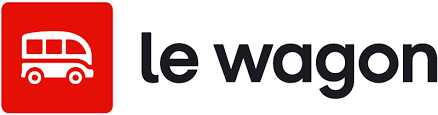

# Greenweez retention matrix

We will study covid's impact on Greenweez business with a focus on users'retention.

Covid lockdowns in France:
- from March 17 to May 11, 2020, i.e. 1 month and 25 days;
- from October 30 to December 15, 2020, i.e. 1 month and 15 days;
- from April 3 to May 3, 2021, i.e. 28 days.

## Turnover analysis

a) Load Greenweez orders by executing the following cell. It takes two minutes of execution.

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.course30.gwz_orders` ORDER BY date_date"

df_orders = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")

b) Convert column `date_date` to datetime.

In [ ]:
df_orders["date_date"] = pd.to_datetime(df_orders["date_date"], format="%Y-%m-%d")

c) Set column `date_date` as index

In [ ]:
df_orders = df_orders.set_index("date_date")

In [ ]:
df_orders

,orders_id,customers_id,country,department,total_quantity,total_turnover
date_date,,,,,,
2019-01-01,571,560,FRANCE,77,52,92.71
2019-01-01,324,317,FRANCE,39,45,207.62
2019-01-01,458,451,FRANCE,68,41,95.33
2019-01-01,264,261,FRANCE,81,36,109.13
2019-01-01,87,87,FRANCE,54,46,167.21
...,...,...,...,...,...,...
2021-12-31,1092166,336265,FRANCE,12,32,99.13
2021-12-31,1092064,196299,FRANCE,63,32,145.18
2021-12-31,1092171,276598,FRANCE,06,33,102.08


d) Calculate total turnover per year using `.resample()` method and store result in a `df_y_turnover` variable.

In [ ]:
df_y_turnover = df_orders.resample("Y")["total_turnover"].sum()
df_y_turnover

date_date
2019-12-31    20990674.51
2020-12-31    30413594.84
2021-12-31    25917818.28
Freq: A-DEC, Name: total_turnover, dtype: float64

e) Calculate percentage change 2020 and 2021 vs 2019.
What was covid impact on turnover ?

In [ ]:
df_y_turnover/df_y_turnover.loc["2019-12-31"] - 1

date_date
2019-12-31    0.00000
2020-12-31    0.44891
2021-12-31    0.23473
Freq: A-DEC, Name: total_turnover, dtype: float64

2020 turnover is 44% higher than 2019 boosted by covid lockdown. 
2021 is still 23% higher than 2019. But 2019 turnover is not as important as 2020.

f) We will have a closer look if turnover increase comes from additional users or a bigger average order.

Using `resample()` function, create a new variable `df_m_turnover` which is total turnover per month.

In [ ]:
df_m_turnover = df_orders.resample("M")["total_turnover"].sum()
df_m_turnover

date_date
2019-01-31    1802606.79
2019-02-28    1429057.06
2019-03-31    1786181.78
2019-04-30    1574534.95
2019-05-31    1803311.69
2019-06-30    1716243.97
2019-07-31    1720880.87
2019-08-31    1542003.62
2019-09-30    1883609.72
2019-10-31    1697873.80
2019-11-30    2154418.22
2019-12-31    1879952.04
2020-01-31    2127914.75
2020-02-29    1773345.04
2020-03-31    3615527.13
2020-04-30    2382074.15
2020-05-31    2735214.89
2020-06-30    2246157.21
2020-07-31    2429542.12
2020-08-31    2254295.62
2020-09-30    2430555.88
2020-10-31    2679440.55
2020-11-30    3084167.74
2020-12-31    2655359.76
2021-01-31    3000448.28
2021-02-28    2243738.09
2021-03-31    2700897.52
2021-04-30    2455519.68
2021-05-31    2175772.56
2021-06-30    2032124.21
2021-07-31    1870311.18
2021-08-31    1809694.24
2021-09-30    1881303.15
2021-10-31    1807381.38
2021-11-30    2189361.71
2021-12-31    1751266.28
Freq: M, Name: total_turnover, dtype: float64

g) Plot the result using Plotly express. 
Can you identify a pick in this chart ? Which month is it ?

In [ ]:
import plotly.express as px

fig = px.line(df_m_turnover, title="Turnover France")
fig.show()

Best month is March 2021, it corresponds to the first lockdown in France.

h) Plot a similar chart but showing the average turnover instead. What do you see ?

In [ ]:
fig = px.line(df_orders.resample("M")["total_turnover"].mean(), title="Average order")
fig.show()

March and April 2020 have bigger average order, it was during lockdown. People cook a lot.

i) Let consider that a customer is new when the first order is done.
What does this code do ?


In [ ]:
df_first_orders = df_orders.reset_index().groupby("customers_id", as_index=False).first()
df_first_orders

,customers_id,date_date,orders_id,country,department,total_quantity,total_turnover
0,1,2019-01-01,1,FRANCE,87,12,60.87
1,2,2019-01-01,2,FRANCE,45,8,70.42
2,3,2019-01-01,3,FRANCE,92,20,86.91
3,4,2019-01-01,4,FRANCE,04,32,81.48
4,5,2019-01-01,5,FRANCE,77,14,69.67
...,...,...,...,...,...,...,...
322326,336278,2021-12-31,1092204,FRANCE,77,9,54.85
322327,336279,2021-12-31,1092205,FRANCE,34,1,9.19
322328,336280,2021-12-31,1092208,FRANCE,66,8,37.78
322329,336281,2021-12-31,1092211,FRANCE,01,3,17.42


j) From `df_first_orders` and in a new variable `df_new_customers`, compute the number of new users per month.

Hint: `resample()` function has a on parameter...

In [ ]:
# df_new_customers = df_first_orders.resample("M", on="date_date")["customers_id"].count()
df_new_customers = df_first_orders.resample("M", on="date_date").size()
df_new_customers

date_date
2019-01-31    21980
2019-02-28    13241
2019-03-31    14044
2019-04-30    11359
2019-05-31    10953
2019-06-30     9541
2019-07-31     9527
2019-08-31     8550
2019-09-30     9485
2019-10-31     8257
2019-11-30    10208
2019-12-31     9710
2020-01-31     8194
2020-02-29     6648
2020-03-31    12094
2020-04-30     5223
2020-05-31     8429
2020-06-30     7181
2020-07-31     9081
2020-08-31     8704
2020-09-30     8702
2020-10-31     8754
2020-11-30    12044
2020-12-31     9872
2021-01-31     9312
2021-02-28     7501
2021-03-31     8393
2021-04-30     9039
2021-05-31     7018
2021-06-30     5495
2021-07-31     5107
2021-08-31     4877
2021-09-30     4330
2021-10-31     4928
2021-11-30     6868
2021-12-31     7682
Freq: M, dtype: int64

k) Plot it in a graph with Plotly express. Which months have the most new customers ? Why do we have so many new users before Jul 2019 ? Is it correct ?

In [ ]:
fig = px.line(df_new_customers, title="New customers over time")
fig.show()

It is not correct and it's because we do not have data before 2019. All pre existing customers were considered as news here.

l) What can you conclude ?

A rising turnover during the covid in 2020 due to an increase in the number of new users and a higher average order.

In 2021, the turnover is up compared to 2019 but well below 2020. Some customers started to stop ordering when lockdowns stopped.

## Matrix retention

We will now study how long customers stay to have a better understanding of the previous analysis. We will do a cohort analysis.

a) We won't do resampling methods anymore. Use `.reset_index()` method on `df_orders` to bring back `date_date` as column and not an index anymore.

In [ ]:
df_orders = df_orders.reset_index()
df_orders

,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,2019-01-01,571,560,FRANCE,77,52,92.71
1,2019-01-01,324,317,FRANCE,39,45,207.62
2,2019-01-01,458,451,FRANCE,68,41,95.33
3,2019-01-01,264,261,FRANCE,81,36,109.13
4,2019-01-01,87,87,FRANCE,54,46,167.21
...,...,...,...,...,...,...,...
1035441,2021-12-31,1092166,336265,FRANCE,12,32,99.13
1035442,2021-12-31,1092064,196299,FRANCE,63,32,145.18
1035443,2021-12-31,1092171,276598,FRANCE,06,33,102.08
1035444,2021-12-31,1091874,20673,FRANCE,92,33,97.49


b) In `df_first_orders` variables, rename column `date_date` by `member_at`.
Use `.rename(columns={"old_name":"new_name"})` method.

In [ ]:
df_first_orders = df_first_orders.rename(columns={"date_date": "member_at"})
df_first_orders

,customers_id,member_at,orders_id,country,department,total_quantity,total_turnover
0,1,2019-01-01,1,FRANCE,87,12,60.87
1,2,2019-01-01,2,FRANCE,45,8,70.42
2,3,2019-01-01,3,FRANCE,92,20,86.91
3,4,2019-01-01,4,FRANCE,04,32,81.48
4,5,2019-01-01,5,FRANCE,77,14,69.67
...,...,...,...,...,...,...,...
322326,336278,2021-12-31,1092204,FRANCE,77,9,54.85
322327,336279,2021-12-31,1092205,FRANCE,34,1,9.19
322328,336280,2021-12-31,1092208,FRANCE,66,8,37.78
322329,336281,2021-12-31,1092211,FRANCE,01,3,17.42


c) Add column `member_at` to `df_orders` variable.
For that, we will merge `df_orders` and `df_first_orders` together. Keep only `customers_id` and `member_at` when performing the merge to avoid columns dupicates.

We will store the result in a `df_cohort` variable.

In [ ]:
df_cohort = pd.merge(df_orders, df_first_orders[["customers_id", "member_at"]], how="inner", on="customers_id")
df_cohort

,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover,member_at
0,2019-01-01,571,560,FRANCE,77,52,92.71,2019-01-01
1,2019-01-13,11136,560,FRANCE,77,61,98.96,2019-01-01
2,2019-01-16,13971,560,FRANCE,77,43,87.35,2019-01-01
3,2019-02-15,36619,560,FRANCE,77,41,83.20,2019-01-01
4,2019-03-26,67483,560,FRANCE,77,40,84.61,2019-01-01
...,...,...,...,...,...,...,...,...
1035441,2021-12-31,1092036,336240,FRANCE,51,17,38.61,2021-12-31
1035442,2021-12-31,1092157,336261,FRANCE,39,20,49.93,2021-12-31
1035443,2021-12-31,1092201,336276,FRANCE,75,26,72.36,2021-12-31
1035444,2021-12-31,1091799,336189,FRANCE,22,30,80.48,2021-12-31


d) We will create cohorts based on `member_at` month. Execute cell below to do so. 

Note that because `member_at` is of type datetime, we can cast it to specific format like datetime64[M].

What doest it do exactly ?

In [ ]:
df_cohort["cohort"] = df_cohort["member_at"].astype('datetime64[M]')
df_cohort[["member_at", "cohort"]]

,member_at,cohort
0,2019-01-01,2019-01-01
1,2019-01-01,2019-01-01
2,2019-01-01,2019-01-01
3,2019-01-01,2019-01-01
4,2019-01-01,2019-01-01
...,...,...
1035441,2021-12-31,2021-12-01
1035442,2021-12-31,2021-12-01
1035443,2021-12-31,2021-12-01
1035444,2021-12-31,2021-12-01


e) In a new variable `df_cohort_size` calcylate numer of unique users per `cohor'. You can use `.nunique()` function to do it.

In [ ]:
df_cohort_size = df_cohort.groupby("cohort")["customers_id"].nunique()
df_cohort_size

cohort
2019-01-01    21980
2019-02-01    13241
2019-03-01    14044
2019-04-01    11359
2019-05-01    10953
2019-06-01     9541
2019-07-01     9527
2019-08-01     8550
2019-09-01     9485
2019-10-01     8257
2019-11-01    10208
2019-12-01     9710
2020-01-01     8194
2020-02-01     6648
2020-03-01    12094
2020-04-01     5223
2020-05-01     8429
2020-06-01     7181
2020-07-01     9081
2020-08-01     8704
2020-09-01     8702
2020-10-01     8754
2020-11-01    12044
2020-12-01     9872
2021-01-01     9312
2021-02-01     7501
2021-03-01     8393
2021-04-01     9039
2021-05-01     7018
2021-06-01     5495
2021-07-01     5107
2021-08-01     4877
2021-09-01     4330
2021-10-01     4928
2021-11-01     6868
2021-12-01     7682
Name: customers_id, dtype: int64

f) For this study, we will not take orders made on december 2021 because we do not have them all and will take only orders made by customers having a member_at after 2019.

Filter `df_cohort` on `date_date` < "2021-12-01" and `member_at` > "2019-12-31". 

Filter `df_cohort_size` on "2020-01-01":"2021-11-01"

In [ ]:
df_cohort = df_cohort.loc[(df_cohort["date_date"]<"2021-12-01") & (df_cohort["member_at"]>"2019-12-31")]

df_cohort_size = df_cohort_size.loc["2020-01-01":"2021-11-01"]

g) We will consider a customer being active when it makes an order. We won't consider the first order as being active because it's more like a subscription.

Filter `df_cohort` on `date_date` > `member_at` to do so.

In [ ]:
df_cohort = df_cohort[df_cohort["date_date"] > df_cohort["member_at"]]

h) Look at the cell below and comment what it does.
Execute the cell to create `nb_months` column.

In [ ]:
import numpy as np

df_cohort["nb_months"] = (df_cohort["date_date"] - df_cohort["member_at"]) / np.timedelta64(1,'M')
df_cohort["nb_months"] = df_cohort["nb_months"].astype(int) + 1

i) To be able to create a rentention matrix, we will have to count the number of unique `customer_ids` by `cohort` and `nb_months`. Do it and store the result in a variable `df_retention`.

Don't forget to use as_index=False in groupby() function as we don't want put `cohort` and `nb_months` as indexes.

In [ ]:
df_retention = df_cohort.groupby(["cohort", "nb_months"], as_index=False)["customers_id"].nunique()
df_retention

,cohort,nb_months,customers_id
0,2020-01-01,1,614
1,2020-01-01,2,906
2,2020-01-01,3,923
3,2020-01-01,4,770
4,2020-01-01,5,840
...,...,...,...
272,2021-09-01,2,430
273,2021-09-01,3,243
274,2021-10-01,1,368
275,2021-10-01,2,292


j) From `df_retention` create a pivot table with `cohort` as index and `nb_months` as columns.

Complete the code below to do it.

This result is what we call a retention matrix:
- A row gives the percentage of users of the cohort still active over the months
- A column gives the evolution of the percentage of users still active at the end of this period over the cohorts.

In [ ]:
retention = pd.pivot_table(df_retention, index="cohort", columns="nb_months")

# delete one column index level
retention.columns = retention.columns.droplevel()
retention

nb_months,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01-01,614.0,906.0,923.0,770.0,840.0,736.0,704.0,747.0,713.0,791.0,...,615.0,604.0,544.0,478.0,414.0,385.0,418.0,424.0,399.0,249.0
2020-02-01,724.0,798.0,745.0,697.0,644.0,596.0,663.0,573.0,677.0,656.0,...,485.0,454.0,352.0,370.0,339.0,344.0,332.0,346.0,205.0,NaN
2020-03-01,2435.0,2024.0,1624.0,1375.0,1389.0,1313.0,1339.0,1626.0,1365.0,1201.0,...,987.0,808.0,806.0,727.0,757.0,735.0,728.0,443.0,NaN,NaN
2020-04-01,835.0,831.0,736.0,669.0,677.0,682.0,770.0,736.0,611.0,746.0,...,429.0,403.0,378.0,383.0,334.0,365.0,239.0,NaN,NaN,NaN
2020-05-01,901.0,1045.0,994.0,979.0,917.0,1075.0,1064.0,817.0,895.0,812.0,...,515.0,458.0,491.0,510.0,481.0,324.0,NaN,NaN,NaN,NaN
2020-06-01,753.0,836.0,790.0,803.0,805.0,831.0,701.0,775.0,619.0,665.0,...,402.0,402.0,390.0,399.0,239.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,849.0,900.0,993.0,965.0,971.0,749.0,888.0,719.0,714.0,657.0,...,509.0,447.0,480.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,801.0,1038.0,1067.0,988.0,825.0,936.0,800.0,788.0,616.0,560.0,...,471.0,466.0,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,812.0,1117.0,1057.0,863.0,970.0,811.0,807.0,691.0,556.0,566.0,...,525.0,312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


k) Results are difficult to read when it's not represented as purcentage of active users.

We need to divide those values by `df_cohort_size` we calculated before. 
Because we are not divided by a simple value but by a pandas.Series indexed by a date, you will need to use `.div()` function.

**Hint: be careful to choose the good axis parameter**

In [ ]:
retention = retention.div(df_cohort_size, axis=0)
retention

nb_months,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.074933,0.110569,0.112643,0.093971,0.102514,0.089822,0.085917,0.091164,0.087015,0.096534,...,0.075055,0.073712,0.066390,0.058335,0.050525,0.046986,0.051013,0.051745,0.048694,0.030388
2020-02-01,0.108905,0.120036,0.112064,0.104844,0.096871,0.089651,0.099729,0.086191,0.101835,0.098676,...,0.072954,0.068291,0.052948,0.055656,0.050993,0.051745,0.049940,0.052046,0.030836,NaN
2020-03-01,0.201340,0.167356,0.134281,0.113693,0.114850,0.108566,0.110716,0.134447,0.112866,0.099305,...,0.081611,0.066810,0.066645,0.060112,0.062593,0.060774,0.060195,0.036630,NaN,NaN
2020-04-01,0.159870,0.159104,0.140915,0.128087,0.129619,0.130576,0.147425,0.140915,0.116983,0.142830,...,0.082137,0.077159,0.072372,0.073330,0.063948,0.069883,0.045759,NaN,NaN,NaN
2020-05-01,0.106893,0.123977,0.117926,0.116147,0.108791,0.127536,0.126231,0.096927,0.106181,0.096334,...,0.061099,0.054336,0.058251,0.060505,0.057065,0.038439,NaN,NaN,NaN,NaN
2020-06-01,0.104860,0.116418,0.110013,0.111823,0.112101,0.115722,0.097619,0.107924,0.086200,0.092605,...,0.055981,0.055981,0.054310,0.055563,0.033282,NaN,NaN,NaN,NaN,NaN
2020-07-01,0.093492,0.099108,0.109349,0.106266,0.106927,0.082480,0.097787,0.079176,0.078626,0.072349,...,0.056051,0.049224,0.052858,0.031604,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,0.092027,0.119256,0.122587,0.113511,0.094784,0.107537,0.091912,0.090533,0.070772,0.064338,...,0.054113,0.053539,0.028837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.093312,0.128361,0.121466,0.099173,0.111469,0.093197,0.092737,0.079407,0.063893,0.065043,...,0.060331,0.035854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


l) As always, visualisation skills are fundamental if we want to analyse those data.

Execute the cell below that uses Plotly Express and the method `imshow()`.

In [ ]:
import plotly.express as px

fig = px.imshow(retention, text_auto=".0%") 
fig.show()

m) What conclusions can you make?

- Percentage of users who re-purchase after X months decreases with cohort over time
- December cohort is less active than the others because they are customers who came mainly for Christmas and do not re-purchase afterwards
- Users who signed up during the covid lockdown periods are more loyal than others
